# General properties and calculations
For Argon propellant

In [1]:
# Base imports
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from CoolProp.CoolProp import PropsSI

# Custom packages
import IdealThrust as it
import saha

matplotlib.matplotlib_fname()

'/home/emmanuel/.config/matplotlib/matplotlibrc'

In [2]:
## Define and print some useful values
R_UNIV = 8.31446261815324  # J mol^-1 K^-1, Universal gas constant

workingFluid = 'Argon'
standard_pressure = 101.3e3  # Pa, atmospheric pressure
standard_temperature = 273.15  # K, standard temperature (0C)
room_temperature = 300  # K, ambient temperature

gamma = PropsSI('isentropic_expansion_coefficient', 
    'P', standard_pressure, 
    'T', room_temperature, 
    workingFluid)
GAMMA = it.getGAMMA(gamma)
molarMass = PropsSI('M', workingFluid)

Rg = R_UNIV/molarMass

print('gamma=', gamma)
print('GAMMA=', GAMMA)
print('M=', molarMass, 'kg/mol')
print('Rg=', Rg, 'J/kg-K')

gamma= 1.6685069176090714
GAMMA= 0.7264478807262494
M= 0.039948 kg/mol
Rg= 208.1321372322329 J/kg-K


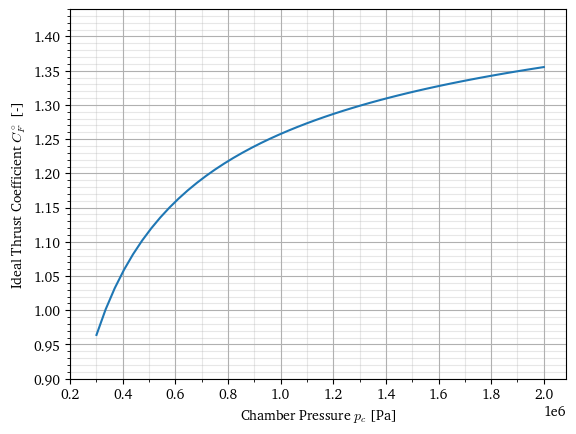

In [12]:
## Computing ideal expansion thrust factor
min_pc = 3e5  # Pa
max_pc = 20e5  # Pa
chamber_pressures = np.linspace(min_pc, max_pc)
cf_ideal = it.cf_ideal(gamma, standard_pressure, chamber_pressures)

# Plotting
plt.plot(chamber_pressures, cf_ideal)
plt.xlabel('Chamber Pressure $p_c$ [Pa]')
plt.ylabel('Ideal Thrust Coefficient $C_F^\circ$ [-]')
plt.xticks(np.arange(min_pc-1e5, max_pc+1e5, 2e5))
plt.xticks(np.arange(min_pc, max_pc+1e5, 1e5), minor=True)
ylocs, ylab = plt.yticks()
ylocs_step = ylocs[1]-ylocs[0]
plt.yticks(np.arange(ylocs[0], ylocs[-1]+ylocs_step, ylocs_step))
plt.yticks(np.arange(ylocs[0], ylocs[-1]+ylocs_step, ylocs_step/5), minor=True)
plt.grid(which='major')
plt.grid(which='minor', alpha=0.3)

plt.show()

In [ ]:
## Computing associated nozzle geometry
